<a href="https://colab.research.google.com/github/Skidoman/Project-MDPW-Kel_3/blob/main/TPM%20Tugas%20Mandiri.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install catboost

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder



from sklearn.model_selection import train_test_split, RandomizedSearchCV

from sklearn.metrics import confusion_matrix,accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [ ]:
path = '/content/Data Training.csv'
df = pd.read_csv(path,sep = ";")
df_test = pd.read_csv('/content/Data Testing.csv',sep = ";")

In [ ]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,NaN,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [ ]:
df_test.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,NaN,NaN,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


In [ ]:
print(df.columns)

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')


In [ ]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [ ]:
df.isnull().sum()

,0
age,0
job,330
marital,80
education,1731
default,8597
housing,990
loan,990
contact,0
month,0
day_of_week,0


In [ ]:
df_test.isnull().sum()

,0
age,0
job,39
marital,11
education,167
default,803
housing,105
loan,105
contact,0
month,0
day_of_week,0


Tahap Penanganan missing value yang pertama adalah melihat seperti apa kolom data dengan missing value tersebut

<ipython-input-14-69f327138b32>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='job', data=df, palette='Set2')


Text(0.5, 0, 'Job')

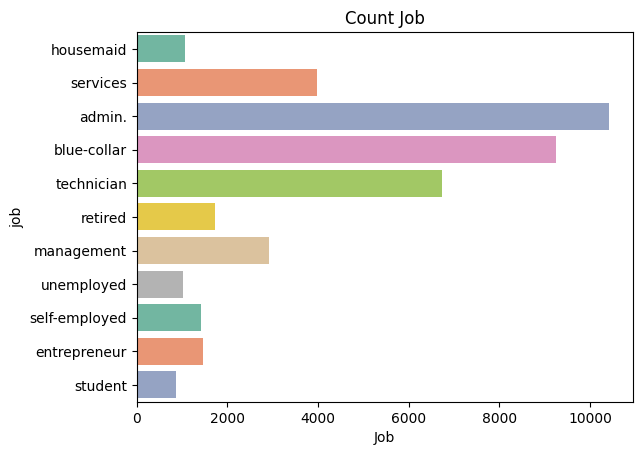

In [ ]:
sns.countplot(y='job', data=df, palette='Set2')

# Add title and labels
plt.title('Count Job')
plt.xlabel('Job')

Susah untuk menentukan pola missing value

In [ ]:
marital  = df['marital'].value_counts()
marital

,count
marital,
married,24928
single,11568
divorced,4612


In [ ]:
education = df['education'].value_counts()
education

,count
education,
university.degree,12168
high.school,9515
basic.9y,6045
professional.course,5243
basic.4y,4176
basic.6y,2292
illiterate,18


In [ ]:
default = df['default'].value_counts()
default

,count
default,
no,32588
yes,3


Jumlah default dari 41000+ orang yang macet hanya 3, ada kemungkinan besar missing data tersebut karena orang yang kreditnya macet tidak ingin mengakui hal tersebut, karena hal ini penggunaan variabel ini kurang berguna
-> (penghapusan kolom)

In [ ]:
housing = df['housing'].value_counts()
housing

,count
housing,
yes,21576
no,18622


In [ ]:
loan = df['loan'].value_counts()
loan

,count
loan,
no,33950
yes,6248


Karena yang missing value adalah data multi/biner kategorik, maka dilakukan penghapusan:
1. Penghapusan kolom untuk variabel default
2. penghapusan kasus untuk variabel selain default

In [ ]:
df_cleaned = df.dropna(subset=["default"])
df_cleaned = df_cleaned.dropna()
df_test_cleaned = df_test.dropna(subset=["default"])
df_test_cleaned = df_test_cleaned.dropna()

In [ ]:
df_cleaned.isnull().sum()

,0
age,0
job,0
marital,0
education,0
default,0
housing,0
loan,0
contact,0
month,0
day_of_week,0


Eksplorasi

Peubah-peubah yang digunakan ialah:

• Karakteristik nasabah
1. age (numeric)
2. job : jenis pekerjaan (categorical: "admin.", "blue-collar", "entrepreneur", "housemaid",
"management", "retired", "self-employed", "services", "student", "technician",
"unemployed")
3. marital : status pernikahan (categorical: "divorced", "married", "single”)
4. education (categorical: "basic.4y", "basic.6y", "basic.9y", "high.school", "illiterate",
"professional.course", "university.degree")
5. default: apakah memiliki kredit macet? (categorical: "no", "yes")
6. housing: memiliki pinjaman perumahan? (categorical: "no", "yes")
7. loan: memiliki pinjaman pribadi? (categorical: "no", "yes")

• Terkait dengan kontak terakhir dari kampanye saat ini :
8. contact: jenis komunikasi kontak (categorical: "cellular", "telephone")
9. month: bulan kontak terakhir dalam setahun (categorical: "jan", "feb", "mar", ...,
"nov", "dec”)
10. day_of_week: hari kontak terakhir dalam seminggu (categorical: "mon", "tue", "wed", "thu", "fri")
11. duration: durasi kontak terakhir, dalam detik (numeric). Catatan penting: peubah ini sangat memengaruhi
target keluaran (misalnya, jika durasi=0 maka y=“no”). Namun, durasi tidak diketahui sebelum panggilan
dilakukan. Selain itu, setelah pemanggilan selesai, y baru diketahui dengan jelas. Dengan demikian,
peubah ini hanya boleh disertakan untuk tujuan tolak ukur dan harus disisihkan jika tujuannya adalah
untuk memiliki model prediksi yang realistis.

• Peubah lainnya:

12. campaign: jumlah kontak yang dilakukan selama kampanye untuk nasabah (numeric, termasuk kontak
terakhir)
13. pdays: jumlah hari yang telah berlalu setelah klien terakhir kali dihubungi dari kampanye sebelumnya
(numeric; 999 berarti nasabah tidak dihubungi sebelumnya)
14. previous: jumlah kontak yang dilakukan sebelum kampanye untuk nasabah (numeric)
15. poutcome: hasil dari kampanye pemasaran sebelumnya (categorical: "failure", "nonexistent", "success")

• Peubah terkait konteks sosial ekonomi:
16. emp.var.rate: tingkat variasi pekerjaan - indikator triwulanan (numeric)
17. cons.price.idx: indeks harga konsumen - indikator bulanan (numeric)
18. cons.conf.idx: indeks kepercayaan konsumen - indikator bulanan (numeric)
19. euribor3m: suku bunga euribor 3 bulan - indikator harian (numeric)
20. nr.employed: jumlah karyawan - indikator kuartalan (numeric)


21. y - apakah klien berlangganan deposito berjangka? (binary: "yes", "no")

<ipython-input-22-9aa9fa0872ba>:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(x='age', data=df_cleaned, palette='Set2')


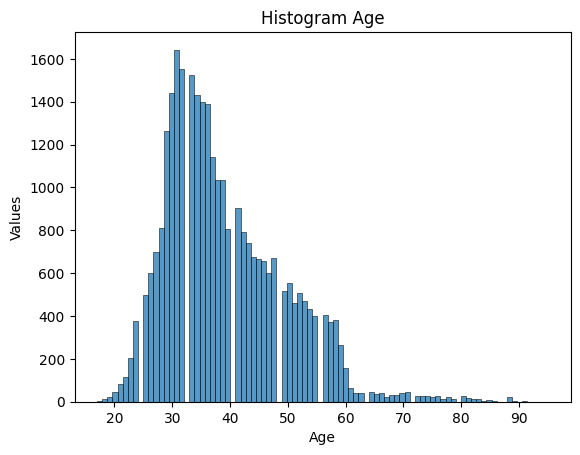

In [ ]:
sns.histplot(x='age', data=df_cleaned, palette='Set2')

# Add title and labels
plt.title('Histogram Age')
plt.xlabel('Age')
plt.ylabel('Values')

# Show the plot
plt.show()

Text(0.5, 0, 'Job')

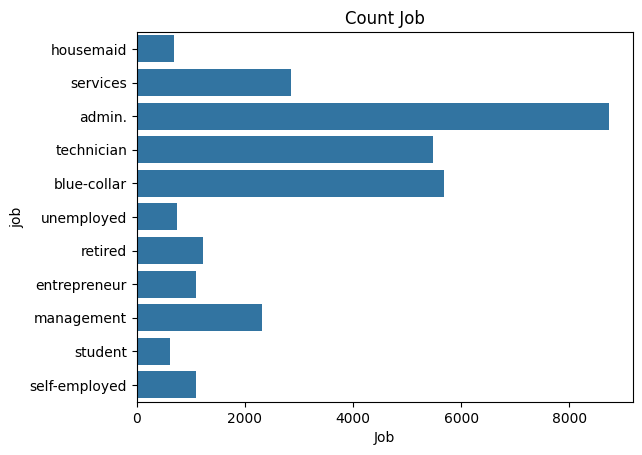

In [ ]:
sns.countplot(y='job', data=df_cleaned)

# Add title and labels
plt.title('Count Job')
plt.xlabel('Job')

Text(0.5, 0, 'marital status')

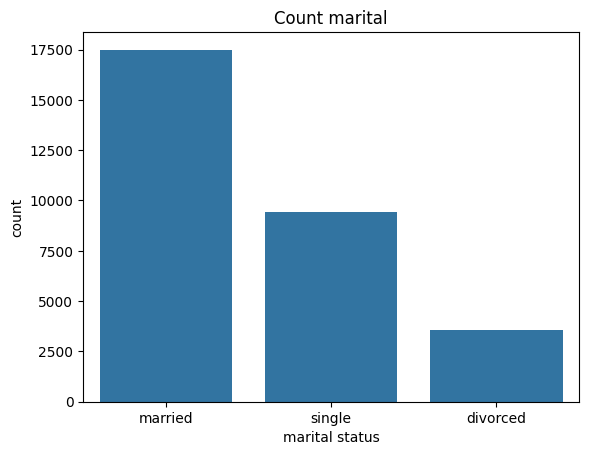

In [ ]:
sns.countplot(x='marital', data=df_cleaned)

# Add title and labels
plt.title('Count marital')
plt.xlabel('marital status')

Text(0.5, 0, 'Education history')

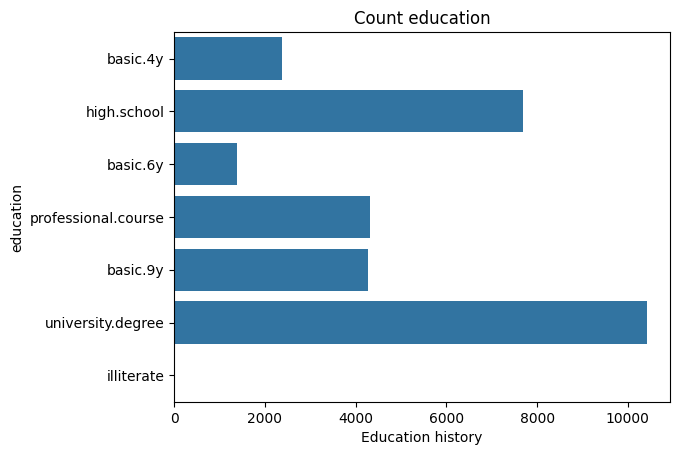

In [ ]:
sns.countplot(y='education', data=df_cleaned)

# Add title and labels
plt.title('Count education')
plt.xlabel('Education history')

Text(0.5, 0, 'housing loan status')

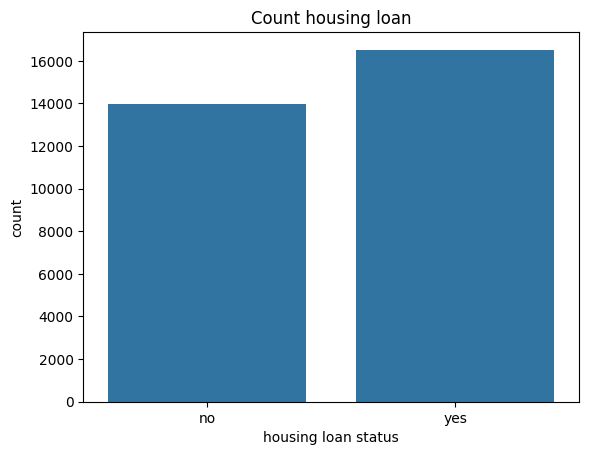

In [ ]:
sns.countplot(x='housing', data=df_cleaned)

# Add title and labels
plt.title('Count housing loan')
plt.xlabel('housing loan status')

Text(0.5, 0, 'loan status')

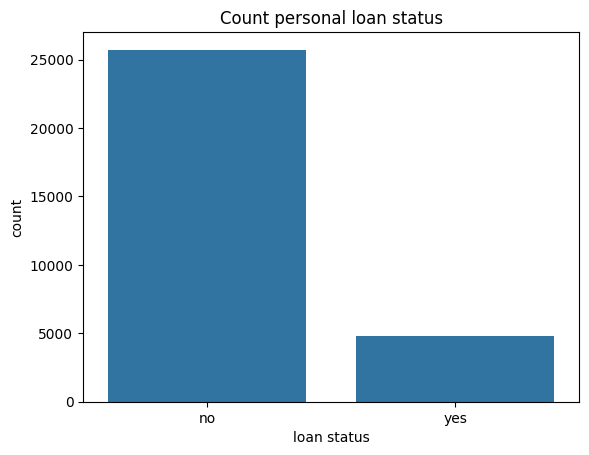

In [ ]:
sns.countplot(x='loan', data=df_cleaned)

# Add title and labels
plt.title('Count personal loan status')
plt.xlabel('loan status')

Terkait kampanye

Text(0.5, 0, 'contact type')

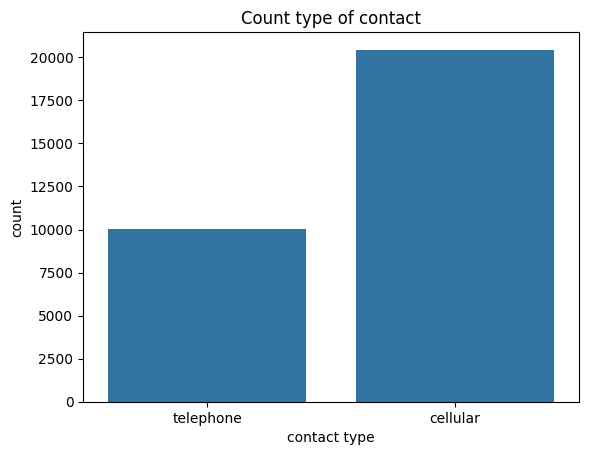

In [ ]:
sns.countplot(x='contact', data=df_cleaned)

# Add title and labels
plt.title('Count type of contact')
plt.xlabel('contact type')

Text(0.5, 0, 'lmonth')

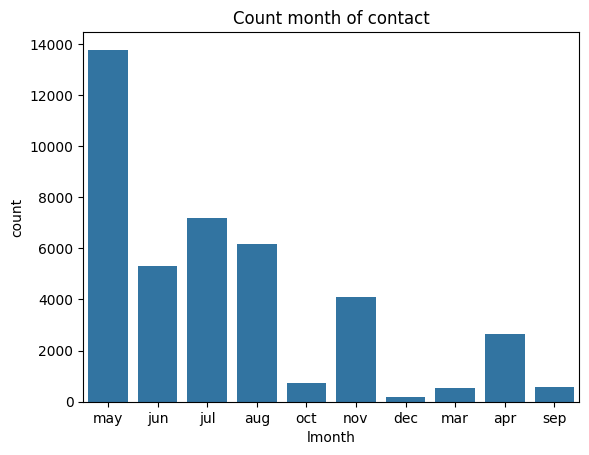

In [ ]:
sns.countplot(x='month', data=df)

# Add title and labels
plt.title('Count month of contact')
plt.xlabel('lmonth')

Text(0.5, 0, 'lmonth')

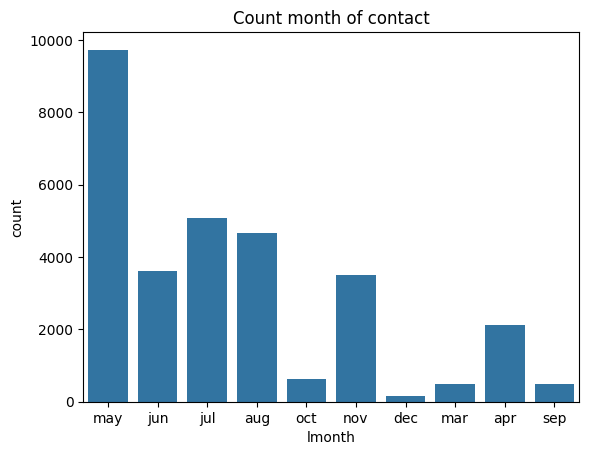

In [ ]:
sns.countplot(x='month', data=df_cleaned)

# Add title and labels
plt.title('Count month of contact')
plt.xlabel('lmonth')

Text(0.5, 0, 'day')

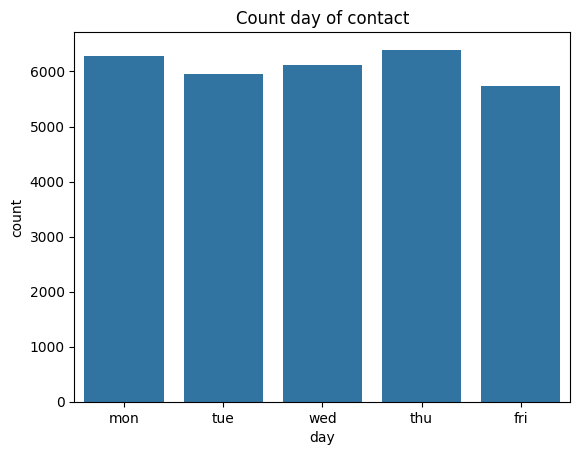

In [ ]:
sns.countplot(x='day_of_week', data=df_cleaned)

# Add title and labels
plt.title('Count day of contact')
plt.xlabel('day')

Untuk sementara peubah lainnya terkait kontak kampanye sebelumnya tidak digunakan

# Pemodelan

Input data testing

In [ ]:
X_train = df_cleaned.drop(['duration', 'campaign', 'pdays', 'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed','y'],axis=1)
y_train = df_cleaned['y']
X_test = df_test_cleaned.drop(['duration', 'campaign', 'pdays', 'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed','y'],axis=1)
y_test = df_test_cleaned['y']

In [ ]:
numeric_cols = ['age']
categorical_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week']

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder

In [ ]:
sc = StandardScaler()
X_train[numeric_cols] = sc.fit_transform(X_train[numeric_cols])
X_test[numeric_cols] = sc.transform(X_test[numeric_cols])

In [ ]:
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1), categorical_cols)
        # Add other transformers here if needed (e.g., for numerical columns)
    ],
    remainder='passthrough'  # Keep other columns (e.g., numerical) unchanged
)

# Fit and transform the training data
X_train_encoded = preprocessor.fit_transform(X_train)

# Transform the testing data
X_test_encoded = preprocessor.transform(X_test)

# Convert the results back to a DataFrame (optional)
encoded_feature_names = preprocessor.get_feature_names_out()
X_train_encoded = pd.DataFrame(X_train_encoded, columns=encoded_feature_names)
X_test_encoded = pd.DataFrame(X_test_encoded, columns=encoded_feature_names)

print("Training Data (Encoded):")
print(X_train_encoded)

print("\nTesting Data (Encoded):")
print(X_test_encoded)

Training Data (Encoded):
       cat__job  cat__marital  cat__education  cat__default  cat__housing  \
0           3.0           1.0             0.0           0.0           0.0   
1           7.0           1.0             3.0           0.0           1.0   
2           0.0           1.0             1.0           0.0           0.0   
3           7.0           1.0             3.0           0.0           0.0   
4           0.0           1.0             5.0           0.0           0.0   
...         ...           ...             ...           ...           ...   
30483       5.0           1.0             5.0           0.0           1.0   
30484       1.0           1.0             5.0           0.0           0.0   
30485       5.0           1.0             6.0           0.0           1.0   
30486       9.0           1.0             5.0           0.0           0.0   
30487       5.0           1.0             5.0           0.0           1.0   

       cat__loan  cat__contact  cat__month  cat__d

Resampling dengan Smote + undersampling karena Y yang jomplang (data ini digunakan untuk pemodelan individu diluar pycaret)

In [ ]:
# Initialize the encoder
encoder = LabelEncoder()

# Fit and transform the target variable
y_train = encoder.fit_transform(y_train)
y_test = encoder.transform(y_test)

# Check the mapping
print(encoder.classes_)
print(y_train)
print(y_test)

['no' 'yes']
[0 0 0 ... 0 1 0]
[0 0 0 ... 0 0 0]


In [ ]:
!pip install imblearn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 238.4/238.4 kB 5.4 MB/s eta 0:00:00


In [ ]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTENC
from imblearn.pipeline import Pipeline

categorical_features = [1,2,3,4,5,6,7,8,9]
# Initialize SMOTE-NC with the categorical features specified
smote_nc = SMOTENC(categorical_features=categorical_features, sampling_strategy=0.5, random_state=42)

# Initialize RandomUnderSampler to undersample the majority class
undersample = RandomUnderSampler(sampling_strategy=0.5, random_state=42)

# Define the pipeline: first apply SMOTE-NC, then apply RandomUndersampling
resampling_pipeline = Pipeline([
    ('smote', smote_nc),         # Apply SMOTE-NC to oversample the minority class
    ('undersample', undersample) # Apply Random Undersampling to balance the classes
])

X_resampled, y_resampled = resampling_pipeline.fit_resample(X_train_encoded, y_train)

Dummy clasiffier sebagai referance

In [ ]:
def eval_model(model, X_train, X_test, y_train, y_test):
  model.fit(X_train,y_train)

  pred_train = model.predict(X_train)
  pred_test = model.predict(X_test)

  accuracy      = accuracy_score(y_train, pred_train)
  precision     = precision_score(y_train, pred_train)
  recall        = recall_score(y_train, pred_train)
  f1            = f1_score(y_train, pred_train)
  roc_auc       = roc_auc_score(y_train, model.predict_proba(X_train)[:,1])

  acc_test      = accuracy_score(y_test, pred_test)
  prec_test     = precision_score(y_test, pred_test)
  recall_test   = recall_score(y_test, pred_test)
  f1_test       = f1_score(y_test, pred_test)
  roc_auc_test  = roc_auc_score(y_test, model.predict_proba(X_test)[:,1])

  return pd.DataFrame({
      "accuracy train":[accuracy],
      "accuracy test":[acc_test],
      "precision train":[precision],
      "precision test":[prec_test],
      "recall train":[recall],
      "recall test":[recall_test],
      "f1 train":[f1],
      "f1 test":[f1_test],
      "roc auc train":[roc_auc],
      "roc auc test":[roc_auc_test]
  })

In [ ]:
from sklearn.dummy import DummyClassifier
dummy = DummyClassifier(strategy="most_frequent")


In [ ]:
eval_model(dummy,X_resampled,X_test_encoded,y_resampled,y_test)

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


,accuracy train,accuracy test,precision train,precision test,recall train,recall test,f1 train,f1 test,roc auc train,roc auc test
0,0.666667,0.880259,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.5


In [ ]:
from catboost import CatBoostClassifier
cb = CatBoostClassifier(border_count= 254,
                                         verbose= False,
                                         task_type= 'CPU',
                                         random_state= 2122)

In [ ]:
eval_model(cb, X_resampled, X_test_encoded, y_resampled, y_test)

,accuracy train,accuracy test,precision train,precision test,recall train,recall test,f1 train,f1 test,roc auc train,roc auc test
0,0.824546,0.890615,0.846331,0.554795,0.578714,0.437838,0.687394,0.489426,0.887659,0.824786


In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)



In [ ]:
eval_model(rf, X_resampled, X_test_encoded, y_resampled, y_test)

,accuracy train,accuracy test,precision train,precision test,recall train,recall test,f1 train,f1 test,roc auc train,roc auc test
0,0.962921,0.956958,0.937773,0.774942,0.95193,0.902703,0.944799,0.833958,0.994008,0.988141


Random forest memiliki performa yang baik dibandingkan catboost

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_dist = {
    'n_estimators': [25,50,100,200,300,400,500],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': randint(2, 11),
    'min_samples_leaf': randint(1, 11),
    'bootstrap': [True, False],
    'criterion': ['gini', 'entropy']
}

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=100,  # Number of parameter settings that are sampled
    cv=5,        # 5-fold cross-validation
    scoring='accuracy',
    random_state=42,
    n_jobs=-1    # Use all available cores
)

# Fit the model
random_search.fit(X_resampled, y_resampled)

# Print the best parameters and the corresponding score
print("Best parameters found: ", random_search.best_params_)
print("Best cross-validation score: ", random_search.best_score_)

Best parameters found:  {'bootstrap': False, 'criterion': 'gini', 'max_depth': 50, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
Best cross-validation score:  0.8627779414772426


In [ ]:
rf_best = RandomForestClassifier(random_state=42,
                                 bootstrap= False,
                                 criterion= 'gini',
                                 max_depth= 50,
                                 min_samples_leaf= 1,
                                 min_samples_split= 5,
                                 n_estimators= 200)

In [ ]:
eval_model(rf_best, X_resampled, X_test_encoded, y_resampled, y_test)

,accuracy train,accuracy test,precision train,precision test,recall train,recall test,f1 train,f1 test,roc auc train,roc auc test
0,0.960843,0.956958,0.944672,0.788321,0.937434,0.875676,0.941039,0.829706,0.993529,0.986947
